In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

def show_image(image, title=None):
    channels = image.shape[2] if len(image.shape) == 3 else 1
    if channels == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    oldfigsize = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = (image.shape[1]//100+1,image.shape[0]//100+1)
    plt.autoscale(enable=True, axis='both', tight=False)
    plt.axis('off')
    plt.imshow(image, aspect='equal', interpolation='gaussian', cmap='gray' if channels == 1 else None)
    plt.title(title)
    plt.show()
    plt.rcParams["figure.figsize"] = oldfigsize

In [156]:
  def randomShiftScaleRotate(image,    mask,
                           shift_limit=(-0.625, 0.625),
                           scale_limit=(-0.3, 2),
                           rotate_limit=(-15, 15), aspect_limit=(0, 0),
                           borderMode=cv2.BORDER_CONSTANT):
    height, width = image.shape

    angle = np.random.uniform(rotate_limit[0], rotate_limit[1])
    scale = np.random.uniform(1 + scale_limit[0], 1 + scale_limit[1])
    aspect = np.random.uniform(1 + aspect_limit[0], 1 + aspect_limit[1])
    sx = scale * aspect / (aspect ** 0.5)
    sy = scale / (aspect ** 0.5)
    dx = round(np.random.uniform(shift_limit[0], shift_limit[1]) * width)
    dy = round(np.random.uniform(shift_limit[0], shift_limit[1]) * height)

    cc = np.math.cos(angle / 180 * np.math.pi) * sx
    ss = np.math.sin(angle / 180 * np.math.pi) * sy
    rotate_matrix = np.array([[cc, -ss], [ss, cc]])

    box0 = np.array([[0, 0], [width, 0], [width, height], [0, height], ])
    box1 = box0 - np.array([width / 2, height / 2])
    box1 = np.dot(box1, rotate_matrix.T) + np.array([width / 2 + dx, height / 2 + dy])

    box0 = box0.astype(np.float32)
    box1 = box1.astype(np.float32)
    mat = cv2.getPerspectiveTransform(box0, box1)
    image = cv2.warpPerspective(image, mat, (width, height), flags=cv2.INTER_LINEAR, borderMode=borderMode,
                                borderValue=(
                                    0, 0,
                                    0,))
    mask = cv2.warpPerspective(mask, mat, (width, height), flags=cv2.INTER_LINEAR, borderMode=borderMode,
                                borderValue=(
                                    0, 0,
                                    0,))
    return image,  mask

In [167]:
image = cv2.imread('sample6.jpg', cv2.IMREAD_GRAYSCALE)
mask = cv2.imread('sample6-highlighted.jpg', cv2.IMREAD_GRAYSCALE)

In [174]:
crop_img = image[370:370+128, 215:215+128]
crop_mask = mask[370:370+128, 215:215+128]
#show_image(crop_img)
#show_image(crop_mask)
cv2.imwrite("mask_bracket/data/sample_cropped.jpg", crop_img)
cv2.imwrite("mask_bracket/data/mask_cropped.jpg", crop_mask)

True

In [164]:
np.array([1,2,3,5,255], np.float32) / 255

array([0.00392157, 0.00784314, 0.01176471, 0.01960784, 1.        ],
      dtype=float32)

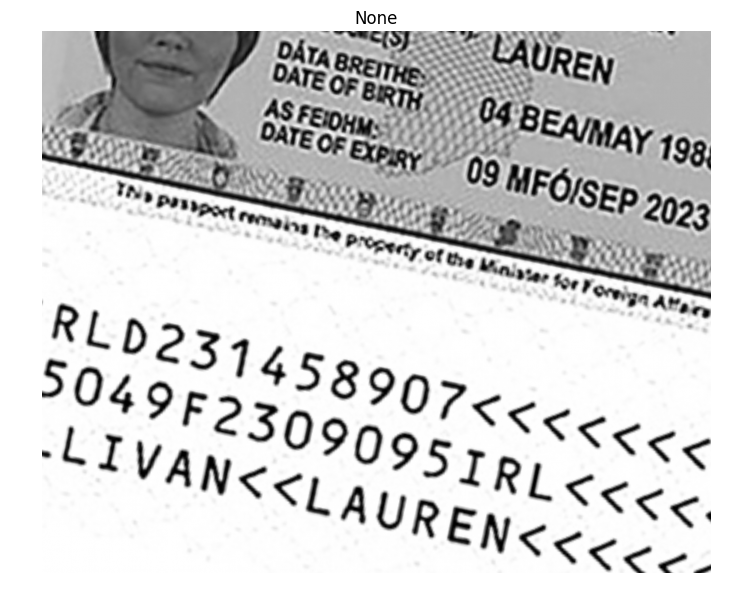

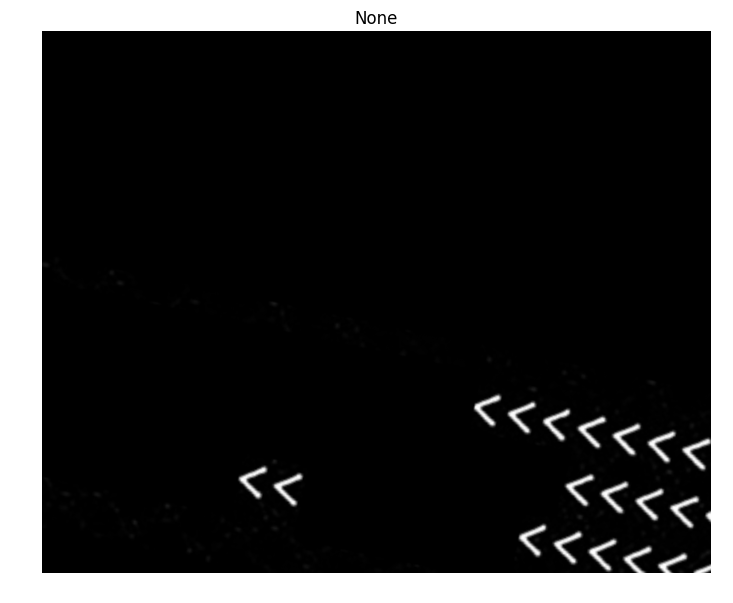

In [161]:
im1, m1 = randomShiftScaleRotate(image, mask)
show_image(im1)
show_image(m1)